<a href="https://colab.research.google.com/github/KomalT2003/ImageProcessing/blob/Enhancement/ENHANCEMENT_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

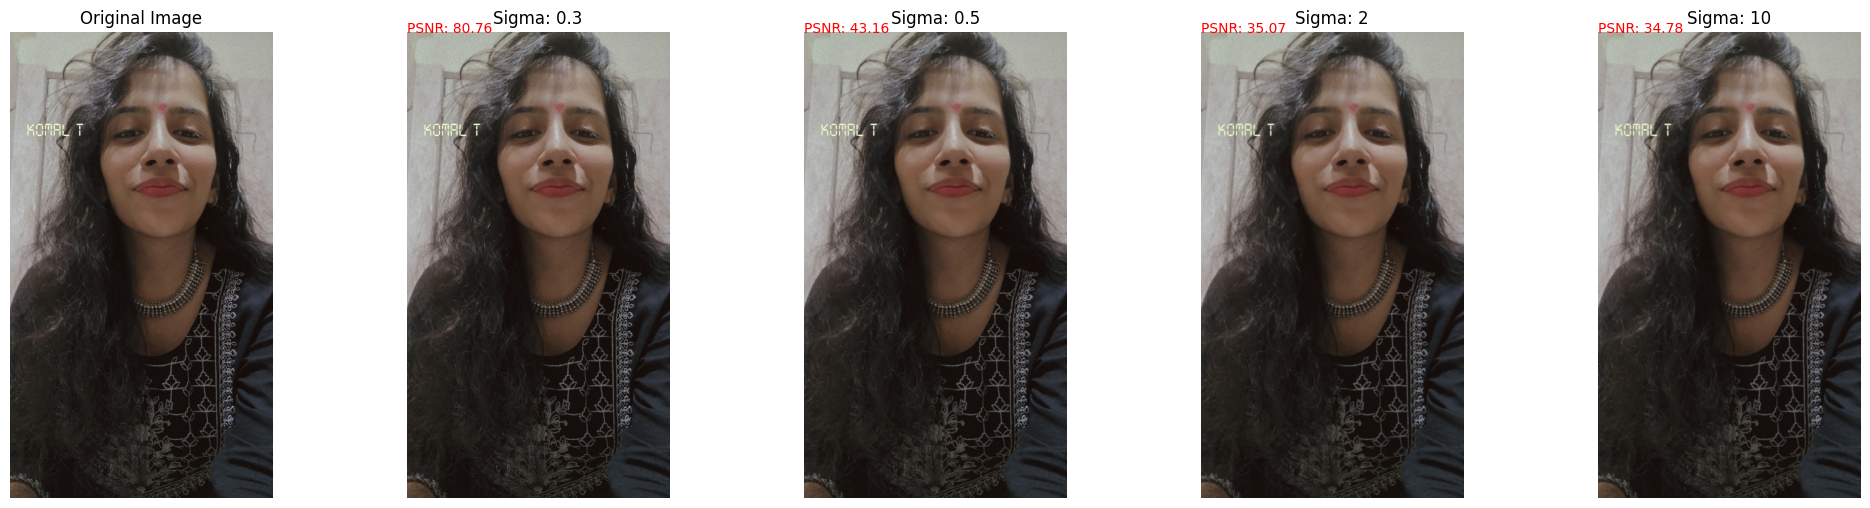

In [ ]:
#Gaussian Filter enhanced image
import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio
import matplotlib.pyplot as plt

def gaussian_kernel(size, sigma):
    kernel = np.fromfunction(
        lambda x, y: (1/ (2 * np.pi * sigma ** 2)) * np.exp(-((x - (size-1)/2) ** 2 + (y - (size-1)/2) ** 2) / (2 * sigma ** 2)),
        (size, size)
    )
    return kernel / np.sum(kernel)

def apply_gaussian_filter(image, kernel):
    return cv2.filter2D(image, -1, kernel)

def calculate_psnr(original, enhanced):
    return peak_signal_noise_ratio(original, enhanced)

def main():
    original_image = cv2.imread('/content/Snapchat-1277258465.jpg')
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    sigmas = [0.3, 0.5, 2, 10]

    plt.figure(figsize=(20, 10))
    plt.subplot(2, len(sigmas) + 1, 1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    for i, sigma in enumerate(sigmas):
        kernel_size = 3
        gaussian_kernel_matrix = gaussian_kernel(kernel_size, sigma)

        enhanced_image = apply_gaussian_filter(original_image, gaussian_kernel_matrix)

        plt.subplot(2, len(sigmas) + 1, i + 2)
        plt.imshow(enhanced_image)
        plt.title(f'Sigma: {sigma}')
        plt.axis('off')

        psnr_value = calculate_psnr(original_image, enhanced_image)
        plt.text(0, 0, f'PSNR: {psnr_value:.2f}', color='red')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()